<a href="https://colab.research.google.com/github/mulcahrj/DATA6545_Final/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np

In [58]:
path = 'https://raw.githubusercontent.com/mulcahrj/DATA6545_Final/main/selected_features_train.csv'
features_train = pd.read_csv(path)

path = 'https://raw.githubusercontent.com/mulcahrj/DATA6545_Final/main/selected_features_test.csv'
features_test = pd.read_csv(path)

In [59]:
features_train.head()

,poutcome_success,emp.var.rate,euribor3m,cons.price.idx,cons.conf.idx,campaign,total_assets,rep_avg_rating,customer_length,qtr_bin_Q1,y
0,0,1.000000,0.967665,0.605052,0.408442,0.573524,0.553302,0.740661,0.787138,0,0
1,0,0.148320,0.061928,0.534818,0.235723,0.744386,0.817121,0.275429,0.357026,0,0
2,0,1.000000,0.968428,0.414483,0.692481,0.000000,0.191640,0.959432,0.966685,0,0
3,0,0.849418,0.929140,0.637496,0.680736,0.000000,0.399434,0.285757,0.369019,0,0
4,0,1.000000,0.967665,0.605052,0.408442,0.391017,0.291517,0.244337,0.325443,0,0


In [60]:
features_train.shape

(33980, 11)

In [61]:
features_test.head() 

,poutcome_success,emp.var.rate,euribor3m,cons.price.idx,cons.conf.idx,campaign,total_assets,rep_avg_rating,customer_length,qtr_bin_Q1,y
0,0,1.000000,0.968772,0.426750,0.688095,0.000000,0.373313,0.492516,0.565686,0,0
1,1,0.149486,0.075470,0.289825,0.190106,0.396426,0.446175,0.881017,0.902103,0,1
2,0,1.000000,0.968772,0.616621,0.405799,0.000000,0.543997,0.702308,0.751870,0,0
3,0,0.420087,0.699399,0.335185,0.438079,0.000000,0.727375,0.153783,0.221523,0,0
4,0,1.000000,0.968394,0.616621,0.447200,0.580737,0.185583,0.028967,0.054738,0,0


In [62]:
features_test.shape

(11327, 11)

In [63]:
!pip install imblearn==0.0

In [64]:
# import required packages for splitting data
from sklearn import model_selection
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import 'XG Boost' model
import xgboost as xgb

# balance the data
from imblearn.over_sampling import SMOTE

### Metrics and Scores

In [65]:
X_train = features_train.iloc[:,:-1]
y_train = features_train.iloc[:,-1]

X_test = features_test.iloc[:,:-1]
y_test = features_test.iloc[:,-1]

In [66]:
#Create a XGB Classifier
xg = xgb.XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)

#Train the model using the training sets
xg.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = xg.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10020
           1       0.67      0.20      0.31      1307

    accuracy                           0.90     11327
   macro avg       0.79      0.59      0.63     11327
weighted avg       0.88      0.90      0.87     11327



In [68]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[9890,  130],
       [1045,  262]])

Text(0.5, 257.44, 'Predicted label')

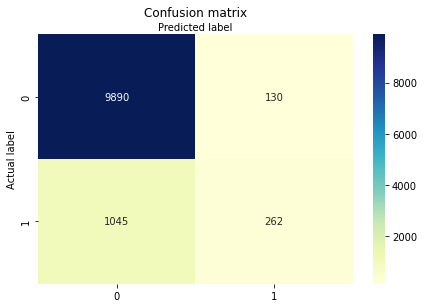

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8962655601659751
Precision: 0.6683673469387755
Recall: 0.20045906656465187


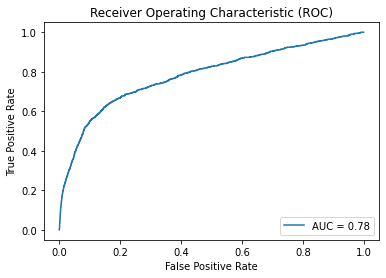

AUC Score: 0.7827873709352526


In [71]:
y_pred_proba = xg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label= 'AUC = %0.2f' % auc)
plt.legend(loc=4)
plt.title('Receiver Operating Characteristic (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC Score:', auc)

In [72]:
feature_imp = pd.Series(xg.feature_importances_, index=list(X_train.columns)).sort_values(ascending=False)
feature_imp

emp.var.rate        0.322917
poutcome_success    0.198083
euribor3m           0.158609
cons.conf.idx       0.098257
qtr_bin_Q1          0.097110
cons.price.idx      0.035491
campaign            0.025271
customer_length     0.022522
total_assets        0.021801
rep_avg_rating      0.019938
dtype: float32

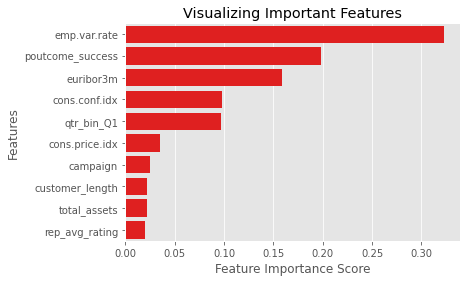

In [73]:
%matplotlib inline
plt.style.use('ggplot')

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index,color='r')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Evaluation Function

In [20]:
clf = xgb.XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)

In [21]:
#function inputs X:features.Y: Target, classifer: sklearn classifier, K:folds in cross validation, scoring: evaluation metric(f1)
def my_eval(X, y, classifer = clf, k=10, scoring = 'f1'):
    scores = []
    for i in range(5):
        #### generate random numbers to shuffle the data for training and test
        np.random.seed(2021)
        random_int = np.random.randint(0,3000)
        #### create cross validation folds
        kfold = model_selection.KFold(n_splits=k, random_state=random_int, shuffle=True)
        #### record the score 
        score = model_selection.cross_val_score(clf, X=X, y=y, cv=kfold, scoring=scoring)
        scores.append(score)
    scores = np.array(scores)
    #### we need to calculate the bias (average score) and viariance (std)
    bias, variance = round(scores.mean(),4), round(scores.std(),4)
    return(bias, variance)

###Smote

In [22]:
# Resampling and Balancing the data
sm = SMOTE(random_state = 2021) 
X_res, Y_res = sm.fit_resample(X_train, y_train) 

## XG Boost

In [23]:
#average f1_score from 10-fold CV 
clf = xgb.XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
my_eval(X_res, Y_res, clf, 10)

(0.8851, 0.0042)

In [24]:
#average ROC_AUC from 10-fold CV
my_eval(X_res, Y_res, clf, 10, 'roc_auc')

(0.9416, 0.0036)